In [9]:
# Naive Bayes
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
import os
os.getcwd()

'C:\\Users\\Vineet\\Desktop\\iAnalyst jupyter\\Machine Learning\\Naive Bayes Classifier'

In [11]:
os.listdir()

['.ipynb_checkpoints', 'Churn_Modelling.csv', 'Naive Bayes-Churn.ipynb']

In [12]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [13]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
dataset.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
dataset=pd.get_dummies(dataset,columns=['Geography','Gender'],drop_first=True)
dataset.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [16]:
dataset.shape

(10000, 12)

In [18]:
dataset.columns[dataset.columns != 'Exited']

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [20]:
features=dataset.columns[dataset.columns != 'Exited']
X=dataset[features]
y=dataset.Exited.copy()

In [21]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [22]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [23]:
#classifier.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [13]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [14]:
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [15]:
classifier.predict_proba(X_test)[0:5,:]   #Predict will give either 0 or 1 as output
                                            #Predict_proba will give the only probability of 1.
#The number of probabilities for each row is equal to the number of categories in target variable. IN this case 5
# here 0.7789 is the probability that the output will be 0 and 0.2210 is the probability of output being 1.

array([[0.7789533 , 0.2210467 ],
       [0.94312425, 0.05687575],
       [0.71653983, 0.28346017],
       [0.88516147, 0.11483853],
       [0.67922771, 0.32077229]])

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1514,   63],
       [ 396,   27]], dtype=int64)

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1577
           1       0.30      0.06      0.11       423

    accuracy                           0.77      2000
   macro avg       0.55      0.51      0.49      2000
weighted avg       0.69      0.77      0.71      2000



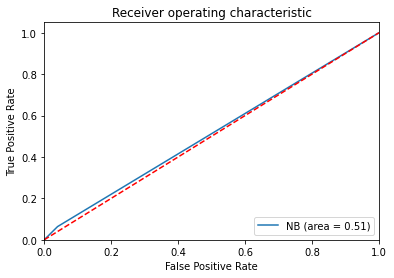

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NB_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

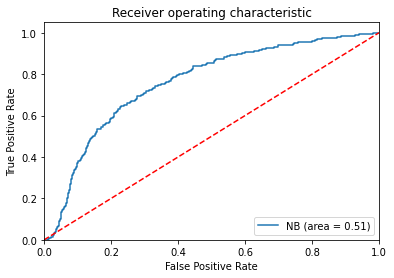

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NB_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [21]:
p=pd.DataFrame(classifier.predict_proba(X_test))
p.columns=['Z','O']
p.head()

,Z,O
0,0.778953,0.221047
1,0.943124,0.056876
2,0.716540,0.283460
3,0.885161,0.114839
4,0.679228,0.320772


In [25]:
X_test.shape[0]

2000

In [39]:
out=np.zeros(X_test.shape[0])
print(out[0:10])
out[p.index[p.O > 0.19]] = 1
print(out[0:10])
print(classification_report(y_test,out))
print("AUC=",roc_auc_score(y_test,out))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 1. 0. 1. 0. 1. 0. 0. 1.]
              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1577
           1       0.38      0.73      0.50       423

    accuracy                           0.69      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.69      0.72      2000

AUC= 0.7027700199828805


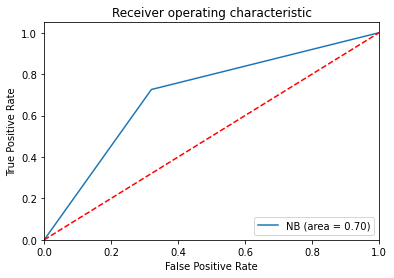

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
NB_roc_auc = roc_auc_score(y_test, out)
fpr, tpr, thresholds = roc_curve(y_test, out)
plt.figure()
plt.plot(fpr, tpr, label='NB (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()